In [25]:
#!/usr/bin/env conda run -n ska3 python
import os
import sys
import shutil
import time
import pytz
import traceback

import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

from Scripts.msidlists import *
# from Scripts.event_times import *
from Scripts.plot_stylers import *

# from forecast_thermals import *
# 
# 
plt.style.use('ggplot')
labelsizes = 14
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = labelsizes


plt.rcParams['axes.titlesize'] = labelsizes
plt.rcParams['axes.labelsize'] = labelsizes
plt.rcParams['xtick.labelsize'] = labelsizes - 2
plt.rcParams['ytick.labelsize'] = labelsizes - 2

In [26]:
def convert_chandra_time(rawtimes):
    """
    Convert input CXC time (seconds since 1998.0) to the time base required for
    the matplotlib plot_date function (days since start of the Year 1 A.D).
    """

    # rawtimes is in units of CXC seconds, or seconds since 1998.0
    # Compute the Delta T between 1998.0 (CXC's Epoch) and 1970.0 (Unix Epoch)

    seconds_since_1998_0 = rawtimes[0]

    cxctime = dt.datetime(1998, 1, 1, 0, 0, 0)
    unixtime = dt.datetime(1970, 1, 1, 0, 0, 0)

    # Calculate the first offset from 1970.0, needed by matplotlib's plotdate
    # The below is equivalent (within a few tens of seconds) to the command
    # t0 = Chandra.Time.DateTime(times[0]).unix
    delta_time = (cxctime - unixtime).total_seconds() + seconds_since_1998_0

    plotdate_start = mdate.epoch2num(delta_time)

    # Now we use a relative offset from plotdate_start
    # the number 86,400 below is the number of seconds in a UTC day

    chandratime = (np.asarray(rawtimes) -
                   rawtimes[0]) / 86400. + plotdate_start

    return chandratime

2233183
2233183
797368
1594736


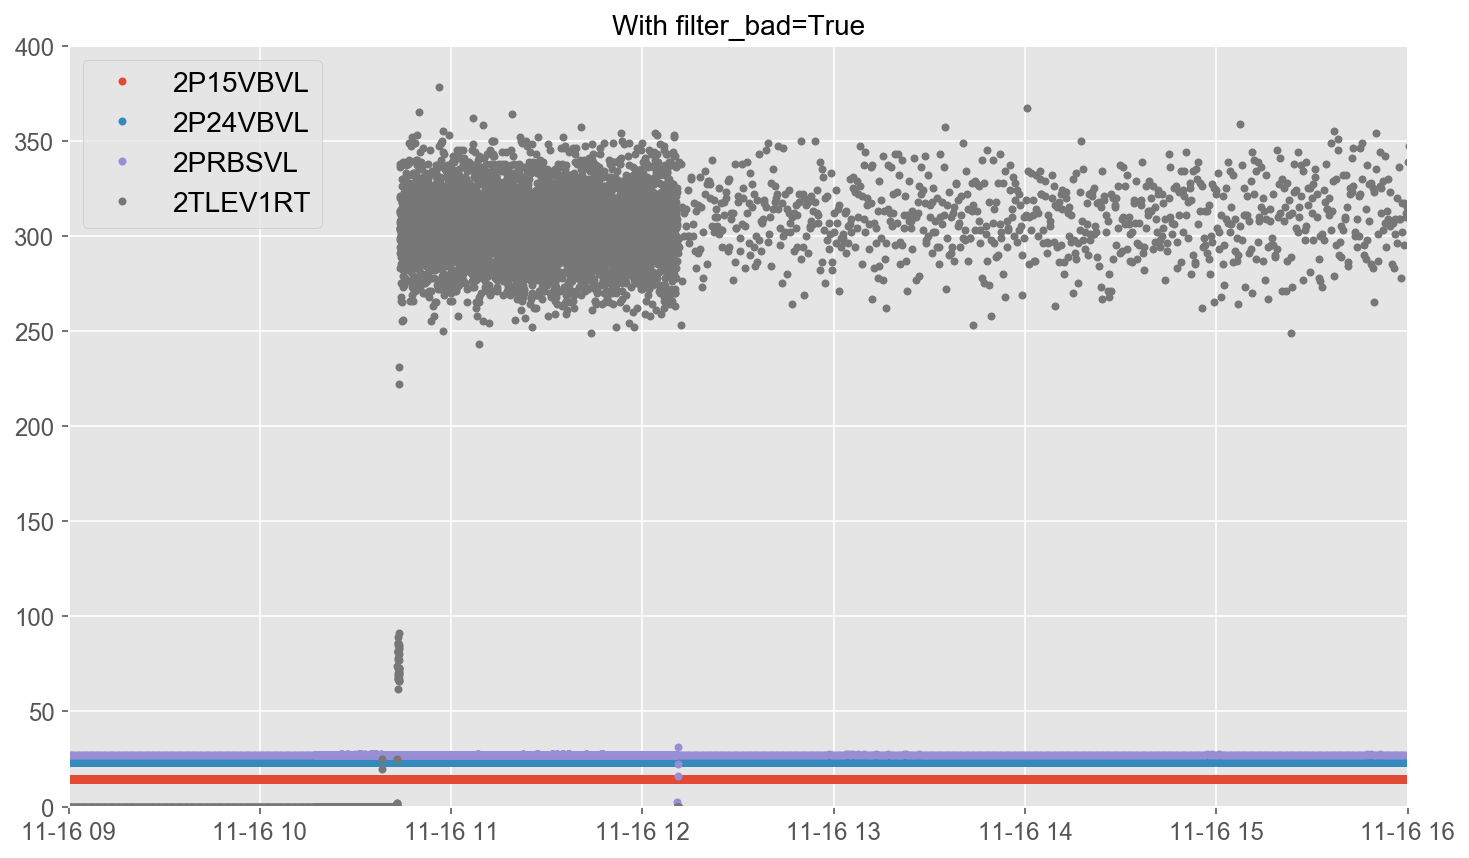

In [49]:
fig, ax = plt.subplots(figsize=(12,7))
fetch.data_source('maude')

msidlist = ['2P15VBVL', '2P24VBVL', '2PRBSVL', '2TLEV1RT']

dat = fetch.MSIDset(msidlist, start='2020:110', filter_bad=False)

for msid in msidlist:
    print(len(dat[msid]))
    try:
        ax.plot_date(convert_chandra_time(dat[msid].times), dat[msid].vals, markersize=3, label=msid)
    except:
        continue

ax.legend()
ax.set_ylim(0, 400)
ax.set_xlim(dt.datetime(2020,11,16, 9), dt.datetime(2020, 11, 16, 16))
# ax.set_yscale('log')
ax.set_title('With filter_bad=True')

plt.show() 


797368


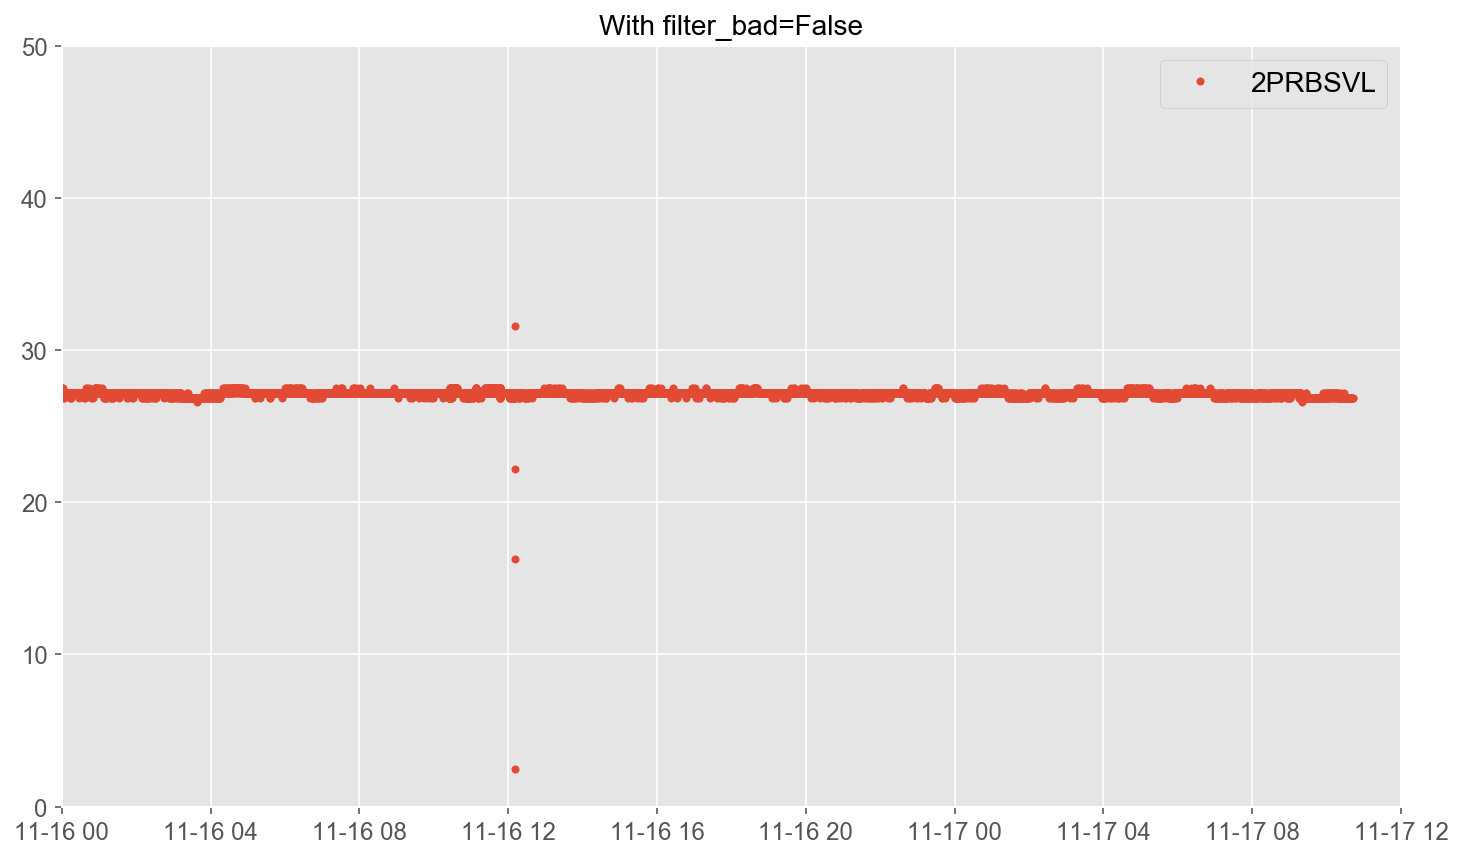

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
fetch.data_source('maude')

msidlist = ['2PRBSVL']

dat = fetch.MSIDset(msidlist, start='2020:110', filter_bad=False)

for msid in msidlist:
    print(len(dat[msid]))
    try:
        ax.plot_date(convert_chandra_time(dat[msid].times), dat[msid].vals, markersize=3, label=msid)
    except:
        continue

ax.legend()
ax.set_ylim(0, 50)
ax.set_xlim(dt.datetime(2020,11,16), dt.datetime(2020, 11, 17, 12))
# ax.set_yscale('log')
ax.set_title('With filter_bad=False')

plt.show() 